# Day 4 - Machine learning 

In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# library Wira DKP
from luwiji.knn import illustration, demo

In [28]:
df_titanic = pd.read_csv('../Data/titanic.csv', index_col='PassengerId')
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


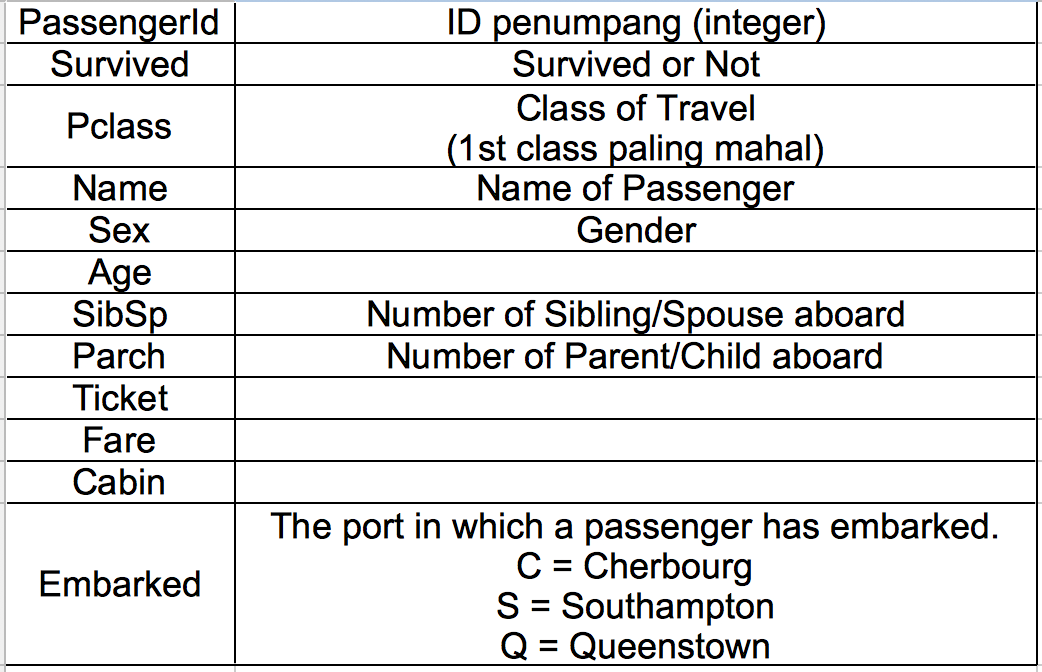

In [29]:
illustration.nomenklatur

In [30]:
# Analisis data
# Drop columns yang tidak digunakan
df_titanic.drop(columns=['Name', 'Ticket'], inplace=True)

In [31]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [32]:
# Cak data null/empty/kosong
df_titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [33]:
df_titanic.drop(columns=['Age','Cabin'], inplace=True)

In [34]:
df_titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [35]:
# Mengisi data/Impute null data
df_titanic.fillna({'Embarked':'S'}, inplace=True)

In [36]:
df_titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [37]:
# Pembagian data sebagai Features/Input dan Target/Label
# Target --> Survived = y
# Features --> negasi Survived = X

X = df_titanic.drop(columns='Survived')
y = df_titanic.Embarked

In [38]:
# Encoding data: merubah data kategorical -> numerik
X = pd.get_dummies(X, columns=['Pclass','Sex','Embarked'])

In [39]:
X.head()

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,1,0,7.2500,0,0,1,0,1,0,0,1
2,1,0,71.2833,1,0,0,1,0,1,0,0
3,0,0,7.9250,0,0,1,1,0,0,0,1
4,1,0,53.1000,1,0,0,1,0,0,0,1
5,0,0,8.0500,0,0,1,0,1,0,0,1


## KNN - K Nearest neighbor

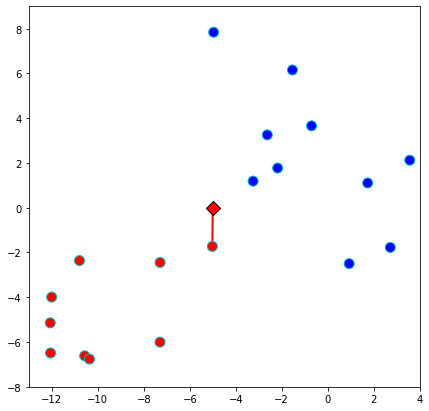

In [40]:
demo.knn()

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [43]:
knn.score(X, y)

1.0

## Split Data 

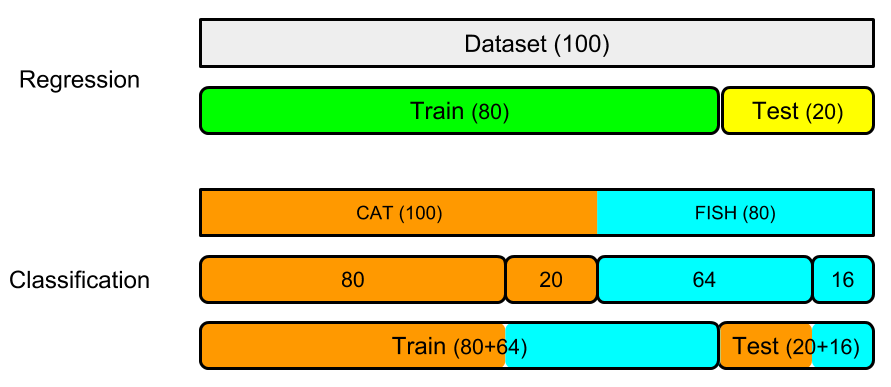

In [44]:
illustration.train_test_split

In [48]:
df_titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

In [54]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [56]:
knn.score(X_train, y_train),  knn.score(X_test, y_test)

(1.0, 0.9608938547486033)

## K-Vold Cross validation 

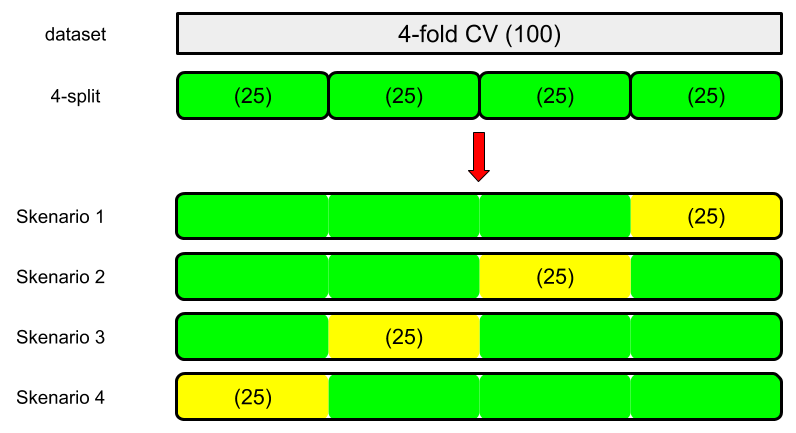

In [57]:
illustration.kfold_cv

In [60]:
from sklearn.model_selection import cross_val_score

In [65]:
cross_val_score(knn, X, y, cv=5).mean()

0.9719666059883247

## Improving Score 
- Feature Engineering
- Tuning Hyperparametere
- Ekperimen Algoritma

## Feature Engineering

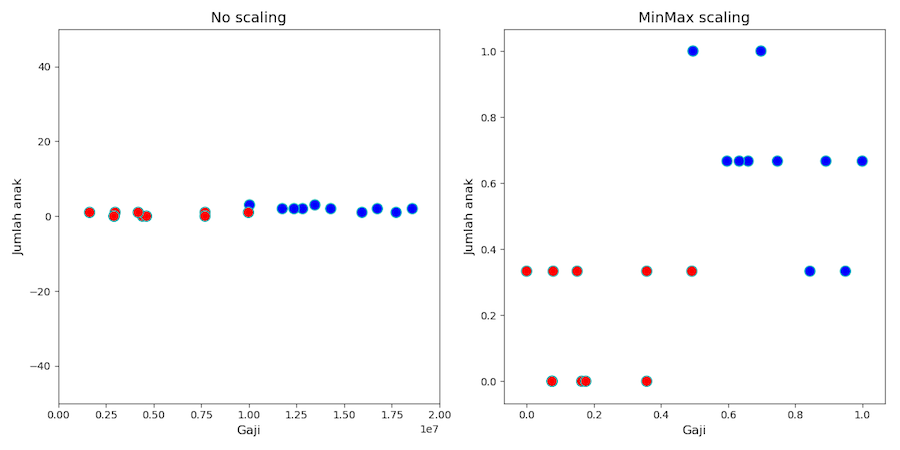

In [66]:
illustration.knn_scaling

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [69]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [72]:
knn.score(X_train_scaled, y_train),  knn.score(X_test_scaled, y_test)

(1.0, 1.0)

## Tuning parameter 

In [73]:
n = range(1,32,2)

In [76]:
train_score = []
test_score = []

for k in n:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
    

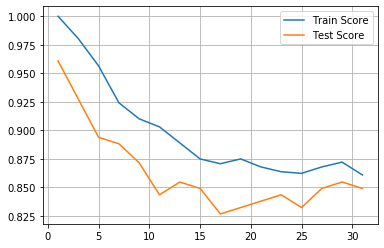

In [81]:
plt.plot(n, train_score, label='Train Score')
plt.plot(n, test_score, label='Test Score')
plt.legend()
plt.grid()
plt.show()

In [82]:
train_score = []
test_score = []

for k in n:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    train_score.append(knn.score(X_train_scaled, y_train))
    test_score.append(knn.score(X_test_scaled, y_test))

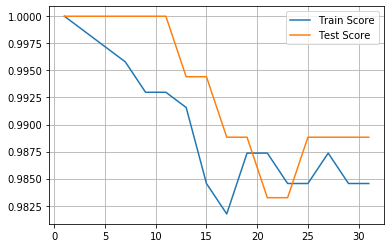

In [83]:
plt.plot(n, train_score, label='Train Score')
plt.plot(n, test_score, label='Test Score')
plt.legend()
plt.grid()
plt.show()

## Tuning Hyperparameter 

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
model_knn = KNeighborsClassifier()
params = {'n_neighbors':range(1,32,2), 'weights':['uniform','distance'], 
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
gscv = GridSearchCV(model_knn, param_grid=params, cv=10)
gscv.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 32, 2),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [86]:
gscv.best_score_

0.9764294631710362

In [87]:
gscv.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

In [88]:
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=1, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [89]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(1.0, 0.9608938547486033)

## Eksperimen Algoritma: Decision Tree 

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
dtc = DecisionTreeClassifier()
params = {'random_state':np.arange(0,20), 'max_depth':np.arange(2,10)}
dtc_gscv = GridSearchCV(dtc, param_grid=params, cv=5)
dtc_gscv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
       

In [93]:
dtc_gscv.best_score_

1.0

In [95]:
dtc_gscv.best_params_

{'max_depth': 2, 'random_state': 0}

In [96]:
dtc = DecisionTreeClassifier(max_depth= 2, random_state= 0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [97]:
dtc.score(X_train, y_train), dtc.score(X_test, y_test)

(1.0, 1.0)

## Eksperimen Algoritma: Random forest 

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rfc = RandomForestClassifier()
params = {'n_estimators':range(100, 500, 100)}
rfc_gscv = GridSearchCV(rfc, param_grid=params, cv=5)
rfc_gscv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [102]:
rfc_gscv.best_score_

1.0

In [103]:
rfc_gscv.best_params_

{'n_estimators': 100}

In [104]:
rfc = RandomForestClassifier(n_estimators= 100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
rfc.score(X_train, y_train), rfc.score(X_test, y_test)

(1.0, 1.0)

## Eksperimen Algoritma: Naive bayes 

In [106]:
from sklearn.naive_bayes import GaussianNB

In [107]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [108]:
nb.score(X_train, y_train), nb.score(X_test, y_test)

(1.0, 1.0)